# Analyze Covid19 dataset from 3 files and examin the stats
source: 
https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_covid_global.csv
raw data: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_covid_global.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_death_covids_global.csv


In [107]:
import pandas as pd
import geopandas as gpd
#import descartes

# Data Visualization Pkg
import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
confirmed_covid_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
death_covid_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_covid_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

In [151]:
df_confirmed_covid = pd.read_csv(confirmed_covid_cases_url)
df_confirmed_covid.head()
df_confirmed_covid.shape

(264, 95)

In [152]:
df_confirmed_covid.shape

(264, 95)

In [153]:
df_confirmed_covid.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

# Reshaping DataFrame
## We will keep some of our columns and melt the rest
### lets see how that works

In [154]:

confirmed_covid_df = df_confirmed_covid.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
confirmed_covid_df.head()

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


## Rename some of the columns

In [155]:
confirmed_covid_df.rename(columns={"variable": "Date", "value":"confirmed_covid"}, inplace = True)
confirmed_covid_df.head()

,Province/State,Country/Region,Lat,Long,Date,confirmed_covid
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [156]:
confirmed_covid_df.shape

(24024, 6)

In [157]:
confirmed_covid_df.tail()

,Province/State,Country/Region,Lat,Long,Date,confirmed_covid
24019,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/21/20,1
24020,NaN,South Sudan,6.877000,31.307000,4/21/20,4
24021,NaN,Western Sahara,24.215500,-12.885800,4/21/20,6
24022,NaN,Sao Tome and Principe,0.186360,6.613081,4/21/20,4
24023,NaN,Yemen,15.552727,48.516388,4/21/20,1


# Create a function to get data and melt the data

In [158]:
def get_n_melt_data(data_url, case_type):
    df = pd.read_csv(data_url)
    melted_df = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long']) 
    melted_df.rename(columns={"variable": "Date", "value":case_type}, inplace = True)
    return melted_df

In [159]:
# Lets fetch the other datasets (recovered_covid and death_covid)
recovered_covid_df = get_n_melt_data(recovered_covid_cases_url, "recovered")
death_covid_df = get_n_melt_data(death_covid_cases_url, "death")

In [160]:
recovered_covid_df.shape

(22750, 6)

In [161]:
death_covid_df.shape

(24024, 6)

In [162]:
confirmed_covid_df.head()

,Province/State,Country/Region,Lat,Long,Date,confirmed_covid
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [163]:
recovered_covid_df.head()

,Province/State,Country/Region,Lat,Long,Date,recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [164]:
death_covid_df.head()

,Province/State,Country/Region,Lat,Long,Date,death
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [165]:
# Merge / Join the datasets

In [168]:
final_df = confirmed_covid_df.join(recovered_covid_df["recovered"]).join(death_covid_df["death"])

In [169]:
final_df.head()

,Province/State,Country/Region,Lat,Long,Date,confirmed_covid,recovered,death
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0


In [170]:
final_df.tail()

,Province/State,Country/Region,Lat,Long,Date,confirmed_covid,recovered,death
24019,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/21/20,1,NaN,0
24020,NaN,South Sudan,6.877000,31.307000,4/21/20,4,NaN,0
24021,NaN,Western Sahara,24.215500,-12.885800,4/21/20,6,NaN,0
24022,NaN,Sao Tome and Principe,0.186360,6.613081,4/21/20,4,NaN,0
24023,NaN,Yemen,15.552727,48.516388,4/21/20,1,NaN,0


In [171]:
# Save the datasets
final_df.to_csv("CoronVirus_Stats_updated.csv")

In [172]:
final_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'confirmed_covid', 'recovered', 'death'],
      dtype='object')

In [173]:
gdf01 = gpd.GeoDataFrame(final_df, geometry = 
                         gpd.points_from_xy(final_df['Long'],
                                            final_df['Lat']))

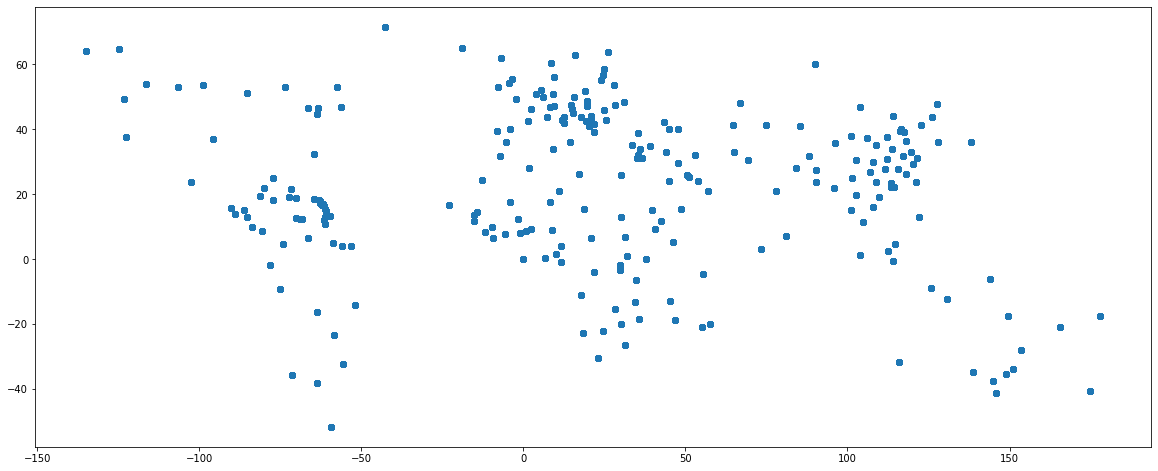

In [174]:
gdf01.plot(figsize=(20,10));

# Overlapping the data on world map

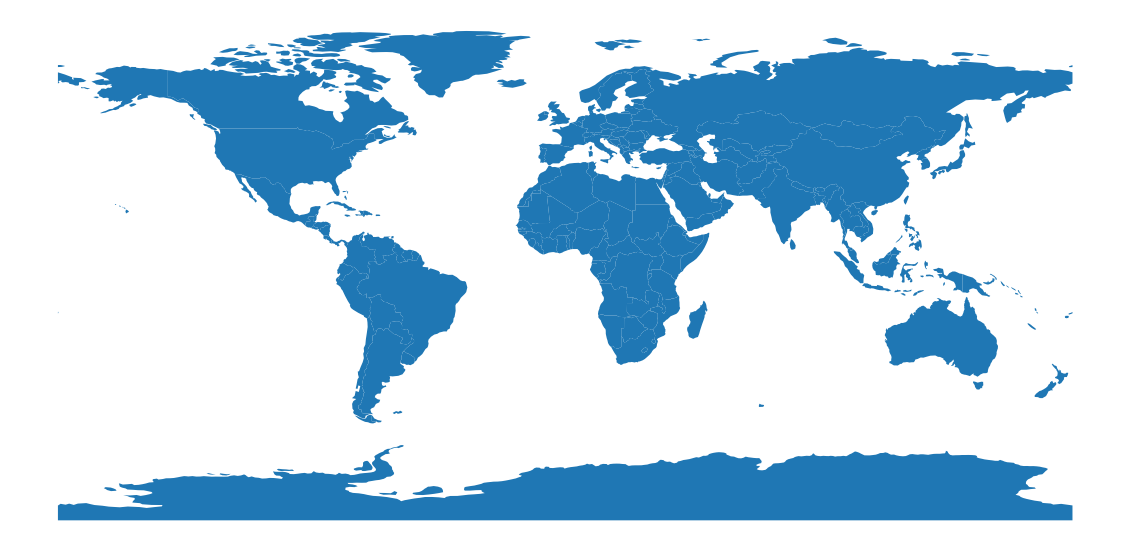

In [175]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
ax = world.plot(figsize=(20,10))
ax.axis('off');

In [176]:
# Overlap with our data

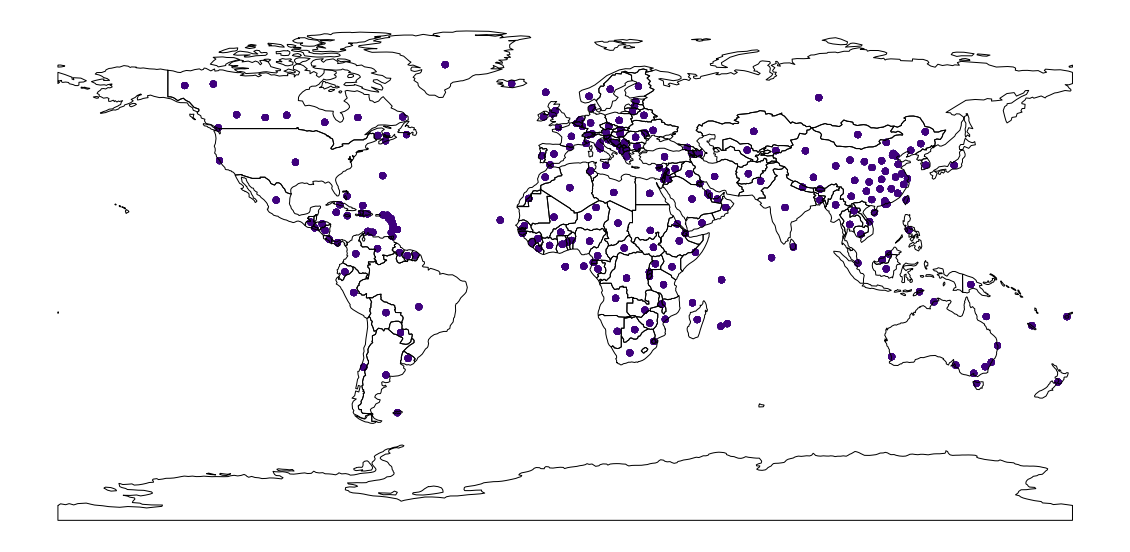

In [177]:
fig, ax = plt.subplots(figsize = (20,10))
gdf01.plot(cmap = "Purples", ax = ax)
world.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth=1, ax = ax);
# Create a subset of the world data that is just the South American continent
# south_america = world[world["continent"] == "South America"]
# south_america.boundary.plot(ax=ax, color="green")
ax.axis('off');